# Aufgabe 22- Fehlerfortpflanzung

## Teilaufgabe a) - Analytische Berechnung
Es sei $y = a_0+a_1x$ mit $a_0 = 1{,}0 \pm 0{,}2$ und $a_1 = 1{,}0 \pm 0{,}2$, der Korrelationskoeffizient sei $\rho=-0{,}8$. Die Kovarianz von $a_0$ und $a_1$ ergibt sich dann zu $\sigma_{a_0{,}a_1} = \sigma_{a_0}\sigma_{a_1}\rho = 0{,}2 \cdot 0{,}2 \cdot (-0{,}8) = -0{,}032$.<br>
Es ist nicht angegeben, welche "Form" der Unsicherheit zu berechnen ist. Wir entscheiden uns für die Varianz, um lästige Wurzeln zu sparen. Um die Standardabweichung zu erhalten, ist stets die positive Wurzel der Varianz zu nehmen. <br>
Mit Vernachlässigung von Korrelation gilt für die Varianz von y
\begin{align}
\sigma_y^2 &= \left (\frac{\partial y}{\partial a_0} \sigma_{a_0}\right)^2 + \left (\frac{\partial y}{\partial a_1} \sigma_{a_1}\right)^2 \\
&= \sigma_{a_0}^2 + \sigma_{a_1}^2 x^2 = 0{,}04 + 0{,}04 \cdot x^2\,.
\end{align}
Wird auch die Korrelation berücksichtigt, so ergibt sich
\begin{align}
\sigma_y^2 &= \left (\frac{\partial y}{\partial a_0} \sigma_{a_0}\right)^2 + \left (\frac{\partial y}{\partial a_1} \sigma_{a_1}\right)^2 + 2 \frac{\partial y}{\partial a_0} \frac{\partial y}{\partial a_1}\sigma_{a_0{,}a_1}\\
&= \sigma_{a_0}^2 + \sigma_{a_1}^2 x^2\, + 2\sigma_{a_0{,}a_1}x = 0{,}04 + 0{,}04 \cdot x^2\ - 0{,}064 \cdot x\,.
\end{align}

## Teilaufgabe b) - Berechnung durch eine Monte-Carlo-Simulation

In [3]:
import numpy as np
import uncertainties as unc
import uncertainties.unumpy as unp
from uncertainties import correlated_values
from uncertainties import ufloat
from scipy import optimize
import matplotlib.pyplot as plt

def parabola(x, a, b, c):
    return a*x**2+b*x+c


def varianceUncorrelated(x, sigma_a0, sigma_a1):
    return sigma_a0**2+sigma_a1**2*x**2


def varianceCorrelated(x, sigma_a0, sigma_a1, cov):
    return sigma_a0**2+sigma_a1**2*x**2 + 2*cov*x

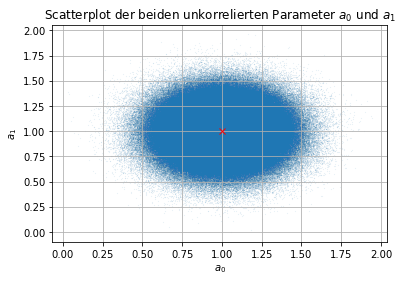

In [4]:
a_0 = ufloat(1.0,0.2)
a_1 = ufloat(1.0,0.2)
rho = -0.8
cov = rho*a_0.s*a_1.s

covmatrix = np.array([[a_0.s**2, 0], [0, a_1.s**2]])
prng = np.random.RandomState(0)
sizeArr = int(1e6)
arrayWithoutCorrelation = prng.multivariate_normal(mean = [a_0.n, a_1.n], cov = covmatrix, size=sizeArr)
a_0_arraywoc = arrayWithoutCorrelation[:,0]
a_1_arraywoc = arrayWithoutCorrelation[:,1]
sizeLin = 100
xlin = np.linspace(-10,10,sizeLin)

plt.scatter(a_0_arraywoc, a_1_arraywoc, s = 0.001)
plt.plot(1,1, 'rx')
plt.grid()
plt.xlabel(r'$a_0$')
plt.ylabel(r'$a_1$')
plt.title(r'Scatterplot der beiden unkorrelierten Parameter $a_0$ und $a_1$')
plt.show()
plt.clf()

In [231]:
varArray = []
for x in xlin:
    y = a_0_arraywoc+a_1_arraywoc*x
    var = np.var(y, ddof = 1)
    varArray.append(var)
    
params, covariance_matrix = optimize.curve_fit(parabola, xlin, varArray)
a, b, c = correlated_values(params, covariance_matrix)
print('Die numerisch durch ein Monte-Carlo-Verfahren geschätzte Varianz von  y = a_0 + a_1 * x ist')
print('\sigma_y^2 = {:2.7f}*x^2'.format(a.n), '+ {:2.7f}*x'.format(b.n), '+ {:2.7f}'.format(c.n))
print('Es wurden', sizeArr, 'Zufallszahlen benutzt und', sizeLin, 'x-Werte verwendet, um diese Formel zu generieren.')

Die numerisch durch ein Monte-Carlo-Verfahren geschätzte Varianz von  y = a_0 + a_1 * x ist
\sigma_y^2 = 0.0400009*x^2 + 0.0001584*x + 0.0399038
Es wurden 1000000 Zufallszahlen benutzt und 100 x-Werte verwendet, um diese Formel zu generieren.


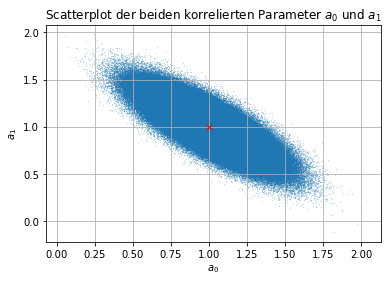

Die numerisch durch ein Monte-Carlo-Verfahren geschätzte Varianz von  y = a_0 + a_1 * x ist
\sigma_y^2 = 0.0399741*x^2 + -0.0639423*x + 0.0399677
Es wurden 1000000 Zufallszahlen benutzt und 100 x-Werte verwendet, um diese Formel zu generieren.


In [232]:
covmatrix = np.array([[a_0.s**2, cov], [cov, a_1.s**2]])
arrayWithCorrelation = np.random.multivariate_normal(mean = [a_0.n, a_1.n], cov = covmatrix, size=sizeArr)
a_0_arraywc = arrayWithCorrelation[:,0]
a_1_arraywc = arrayWithCorrelation[:,1]

plt.scatter(a_0_arraywc, a_1_arraywc, s = 0.01)
plt.plot(1,1, 'rx')
plt.grid()
plt.xlabel(r'$a_0$')
plt.ylabel(r'$a_1$')
plt.title(r'Scatterplot der beiden korrelierten Parameter $a_0$ und $a_1$')
plt.show()
plt.clf()

varArray = []
for x in xlin:
    y = a_0_arraywc+a_1_arraywc*x
    var = np.var(y, ddof = 1)
    varArray.append(var)
    
params, covariance_matrix = optimize.curve_fit(parabola, xlin, varArray)
a, b, c = correlated_values(params, covariance_matrix)
print('Die numerisch durch ein Monte-Carlo-Verfahren geschätzte Varianz von  y = a_0 + a_1 * x ist')
print('\sigma_y^2 = {:2.7f}*x^2'.format(a.n), '+ {:2.7f}*x'.format(b.n), '+ {:2.7f}'.format(c.n))
print('Es wurden', sizeArr, 'Zufallszahlen benutzt und', sizeLin, 'x-Werte verwendet, um diese Formel zu generieren.')

## Teilaufgabe c) - Vergleich

In [233]:
print('Wir wollen zunächst unkorrelierte Variablen betrachten.')
xlin = np.linspace(-3,3,3)
for x in xlin:
    print('x =',x,':')
    meanAn = 1+1*x
    stdAn = np.sqrt(varianceUncorrelated(x, 0.2, 0.2))
    y = a_0_arraywoc+a_1_arraywoc*x
    meanMC = np.mean(y)
    stdMC = np.std(y, ddof = 1)
    print('Die analytische Berechnung ergibt: Mittelwert =', meanAn, ', Standardabweichung =', stdAn)
    print('Mit Monte-Carlo berechnete Werte: Mittelwert =', meanMC,', Standardabweichung =', stdMC)
    print('Die Abweichung im Mittelwert ist', (meanMC-meanAn)/meanAn*100, '%')
    print('Die Abweichung in der Standardabweichung beträgt', (stdMC-stdAn)/stdAn*100, '%')

Wir wollen zunächst unkorrelierte Variablen betrachten.
x = -3.0 :
Die analytische Berechnung ergibt: Mittelwert = -2.0 , Standardabweichung = 0.632455532034
Mit Monte-Carlo berechnete Werte: Mittelwert = -2.00088142319 , Standardabweichung = 0.632010019585
Die Abweichung im Mittelwert ist 0.0440711596498 %
Die Abweichung in der Standardabweichung beträgt -0.0704417031612 %
x = 0.0 :
Die analytische Berechnung ergibt: Mittelwert = 1.0 , Standardabweichung = 0.2
Mit Monte-Carlo berechnete Werte: Mittelwert = 1.00005213364 , Standardabweichung = 0.199759394073
Die Abweichung im Mittelwert ist 0.00521336366857 %
Die Abweichung in der Standardabweichung beträgt -0.120302963351 %
x = 3.0 :
Die analytische Berechnung ergibt: Mittelwert = 4.0 , Standardabweichung = 0.632455532034
Mit Monte-Carlo berechnete Werte: Mittelwert = 4.00098569047 , Standardabweichung = 0.632761651942
Die Abweichung im Mittelwert ist 0.0246422616591 %
Die Abweichung in der Standardabweichung beträgt 0.0484018073425 %

In [234]:
print('Wir wollen nun korrelierte Variablen betrachten.')
xlin = np.linspace(-3,3,3)
for x in xlin:
    print('x =',x,':')
    meanAn = 1+1*x
    stdAn = np.sqrt(varianceCorrelated(x, 0.2, 0.2, -0.032))
    y = a_0_arraywc+a_1_arraywc*x
    meanMC = np.mean(y)
    stdMC = np.std(y, ddof = 1)
    print('Die analytische Berechnung ergibt: Mittelwert =', meanAn, ', Standardabweichung =', stdAn)
    print('Mit Monte-Carlo berechnete Werte: Mittelwert =', meanMC,', Standardabweichung =', stdMC)
    print('Die Abweichung im Mittelwert ist', (meanMC-meanAn)/meanAn*100, '%')
    print('Die Abweichung in der Standardabweichung beträgt', (stdMC-stdAn)/stdAn*100, '%')

Wir wollen nun korrelierte Variablen betrachten.
x = -3.0 :
Die analytische Berechnung ergibt: Mittelwert = -2.0 , Standardabweichung = 0.769415362467
Mit Monte-Carlo berechnete Werte: Mittelwert = -2.00127984539 , Standardabweichung = 0.7691305859
Die Abweichung im Mittelwert ist 0.0639922692974 %
Die Abweichung in der Standardabweichung beträgt -0.0370120718141 %
x = 0.0 :
Die analytische Berechnung ergibt: Mittelwert = 1.0 , Standardabweichung = 0.2
Mit Monte-Carlo berechnete Werte: Mittelwert = 0.999668646156 , Standardabweichung = 0.199919288317
Die Abweichung im Mittelwert ist -0.0331353844259 %
Die Abweichung in der Standardabweichung beträgt -0.0403558414655 %
x = 3.0 :
Die analytische Berechnung ergibt: Mittelwert = 4.0 , Standardabweichung = 0.45607017004
Mit Monte-Carlo berechnete Werte: Mittelwert = 4.0006171377 , Standardabweichung = 0.455969297192
Die Abweichung im Mittelwert ist 0.0154284424357 %
Die Abweichung in der Standardabweichung beträgt -0.0221178349329 %
